In [19]:
import datetime, time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import GridSearchCV

from IPython.display import clear_output, display, HTML

In [20]:
# Ignore warning
import warnings
warnings.filterwarnings('ignore')

In [21]:
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199

In [22]:
train = pd.read_csv("train_preprocessed.csv")
test = pd.read_csv("test_preprocessed.csv")
all_data = pd.read_csv("all_data_preprocessed.csv")

In [23]:
train_X = train.loc[:, train.columns != 'totals_totalTransactionRevenue']
train_y = train['totals_totalTransactionRevenue']

In [24]:
test_X = test.loc[:, test.columns != 'totals_totalTransactionRevenue']
test_y = test['totals_totalTransactionRevenue']

In [25]:
all_data_X = all_data.loc[:, all_data.columns != 'totals_totalTransactionRevenue']
all_data_y = all_data['totals_totalTransactionRevenue']

In [26]:
parameters = {
    'max_depth': [depth for depth in range(2, 20, 2)],
    'min_samples_split': [min_samples for min_samples in range(200, 2001, 200)]
}

for key, values in parameters.items():
    print(key,"\t- ", values)

max_depth 	-  [2, 4, 6, 8, 10, 12, 14, 16, 18]
min_samples_split 	-  [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]


In [27]:
start = time.time()

gridSearchResult = GridSearchCV(DecisionTreeRegressor(random_state = 0),
                                parameters, 
                                cv=5, 
                                scoring='neg_mean_squared_error', 
                                verbose=5
                               ).fit(all_data_X, all_data_y)
clear_output()

end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("Time Taken: {:0>2}:{:0>2}:{:05.3f}".format(int(hours),int(minutes),seconds))

Time Taken: 01:01:19.316


In [28]:
gridSearchResult.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=200, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [29]:
# Show all results
results_df = pd.DataFrame.from_dict(gridSearchResult.cv_results_)
results_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89
mean_fit_time,3.25844,3.6874,4.0158,2.9892,2.9314,2.9032,2.903,2.9246,2.945,2.9258,5.39,5.3172,5.45683,5.29221,5.16821,5.3416,5.4562,5.29521,5.23421,5.271,7.7462,7.6624,7.6798,7.6524,7.7504,7.6892,7.8744,7.7832,7.7786,7.7348,8.919,9.034,9.20962,8.9878,9.1316,9.01421,8.8864,8.9054,8.9638,8.8486,9.23542,8.9728,9.118,8.8692,8.988,8.84362,8.9836,9.01548,9.037,8.8788,9.0916,8.9976,8.968,9.1078,9.182,9.0066,9.04621,8.99088,8.877,8.894,8.9518,9.0122,8.8232,8.899,8.9916,8.8864,8.9504,8.9994,8.7392,8.8676,8.8792,8.96281,8.8434,8.9124,8.7824,8.86461,8.79201,8.806,8.61761,8.9918,8.8918,8.7678,8.90461,8.64041,8.8968,8.9136,8.7368,8.80601,8.8332,8.939
std_fit_time,0.419873,0.426411,0.446437,0.146188,0.068643,0.0558992,0.159357,0.012208,0.0686179,0.0500206,0.0792851,0.135895,0.120709,0.107685,0.0375621,0.0640092,0.0921154,0.0698764,0.0810455,0.137612,0.13961,0.203557,0.147028,0.0809536,0.0924888,0.103011,0.146089,0.109472,0.140113,0.122777,0.140228,0.187605,0.259825,0.135704,0.0521486,0.102023,0.172158,0.101096,0.156921,0.113245,0.208579,0.12808,0.207543,0.129306,0.197367,0.188994,0.153186,0.186615,0.205818,0.100666,0.140449,0.0871736,0.0996317,0.204539,0.086098,0.084793,0.187094,0.0741837,0.136204,0.193234,0.0794871,0.127661,0.0937936,0.209846,0.215059,0.0979326,0.225246,0.207388,0.0825193,0.148613,0.191541,0.183771,0.0651922,0.115278,0.0847514,0.117401,0.150724,0.171043,0.071211,0.134968,0.109516,0.0894644,0.0670988,0.0976622,0.171035,0.196267,0.139934,0.137742,0.144995,0.132729
mean_score_time,0.0785989,0.1154,0.0953978,0.0738011,0.0692014,0.0692,0.0679973,0.0685999,0.0699989,0.0753991,0.0739953,0.0709949,0.0729987,0.06979,0.0709929,0.0745978,0.0688014,0.073598,0.0699922,0.0713982,0.0737989,0.0710002,0.0677984,0.0737952,0.0789989,0.0749965,0.0738011,0.0740002,0.0733996,0.0761999,0.0753974,0.0733962,0.0787975,0.0767961,0.0744017,0.0752008,0.0781974,0.0740003,0.0730003,0.0769989,0.0749982,0.0745989,0.0782007,0.0762009,0.0753955,0.0741969,0.0740004,0.0745972,0.0771985,0.0715974,0.0738009,0.0765996,0.0745997,0.0746012,0.0742002,0.0727968,0.075793,0.0735979,0.0755999,0.0729995,0.0733965,0.0736,0.0763978,0.0733977,0.0734015,0.0728012,0.0738004,0.0733965,0.0746006,0.074798,0.0727966,0.0739935,0.0781994,0.0731961,0.0725966,0.0719954,0.0733945,0.0743953,0.0733936,0.0739984,0.0741952,0.0773938,0.0739964,0.0711902,0.0755982,0.0766014,0.0795993,0.0751949,0.0729953,0.076198
std_score_time,0.011977,0.0315571,0.0263983,0.00591419,0.00231593,0.00256211,0.00141945,0.00135731,0.00297125,0.0069744,0.00414854,0.00167868,0.00309822,0.00193447,0.000888288,0.00574899,0.00203943,0.0102513,0.00141723,0.00215462,0.00194035,0.0034645,0.00132242,0.00444598,0.0110267,0.00167092,0.00278492,0.00228042,0.00215371,0.00526828,0.00224849,0.00186012,0.0104388,0.00240444,0.00272733,0.00624155,0.00752185,0.0025293,0.00209722,0.00399956,0.00260706,0.00136327,0.00534425,0.0039681,0.00366719,0.0011625,0.00178894,0.00195993,0.00278548,0.00195495,0.00183439,0.00241468,0.00407838,0.00257531,0.00376227,0.0019397,0.00223187,0.00272641,0.00185418,0.00227935,0.00205752,0.0024964,0.00875535,0.0017413,0.00344368,0.00247939,0.000977877,0.00264802,0.00135661,0.00231943,0.00231574,0.00357676,0.00646409,0.00160469,0.00149521,0.00189561,0.00257663,0.00293808,0.00162427,0.00290367,0.0028601,0.00595557,0.00268702,0.00172072,0.00102034,0.00500374,0.0134415,0.00425887,0.00419662,0.0023126
param_max_depth,2,2,2,2,2,2,2,2,2,2,4,4,4,4,4,4,4,4,4,4,6,6,6,6,6,6,6,6,6,6,8,8,8,8,8,8,8,8,8,8,10,10,10,10,10,10,10,10,10,10,12,12,12,12,12,12,12,12,12,12,14,14,14,14,14,14,14,14,14,14,16,16,16,16,16,16,16,16,16,16,18,18,18,18,18,18,18,18,18,18
param_min_samples_split,200,400,600,800,1000,1200,1400,1600,1800,2000,200,400,600,800,1000,1200,1400,1600,1800,

In [30]:
# Results with rank 1
rank_one = results_df[results_df['rank_test_score'] == 1][['params', 'mean_fit_time', 'std_fit_time', 'mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']]
rank_one = pd.concat([rank_one['params'].apply(pd.Series), rank_one], axis = 1, sort=True).drop(columns = 'params')
rank_one.T

,20
max_depth,6.000000e+00
min_samples_split,2.000000e+02
mean_fit_time,7.746201e+00
std_fit_time,1.396101e-01
mean_train_score,-1.238378e+15
std_train_score,3.143901e+14
mean_test_score,-1.613924e+15
std_test_score,7.949090e+14


In [31]:
# Results['6, 600']['error']**0.5

In [32]:
start = time.time()

model = DecisionTreeRegressor(
    criterion='mse',
    max_depth=6,
    max_features=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None, 
    min_samples_leaf=1,
    min_samples_split=200, 
    min_weight_fraction_leaf=0.0,
    presort=False, 
    random_state=0, 
    splitter='best').fit(train_X, train_y)

end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
time_taken = "{:0>2}:{:0>2}:{:05.3f}".format(int(hours),int(minutes),seconds)

In [33]:
predictions = pd.Series(model.predict(test_X))

In [34]:
print("Mean Squared Error:", (mean_squared_error(test_y, predictions))**0.5)
print("Time Taken to Fit:", time_taken)

Mean Squared Error: 33893528.222389735
Time Taken to Fit: 00:00:7.684


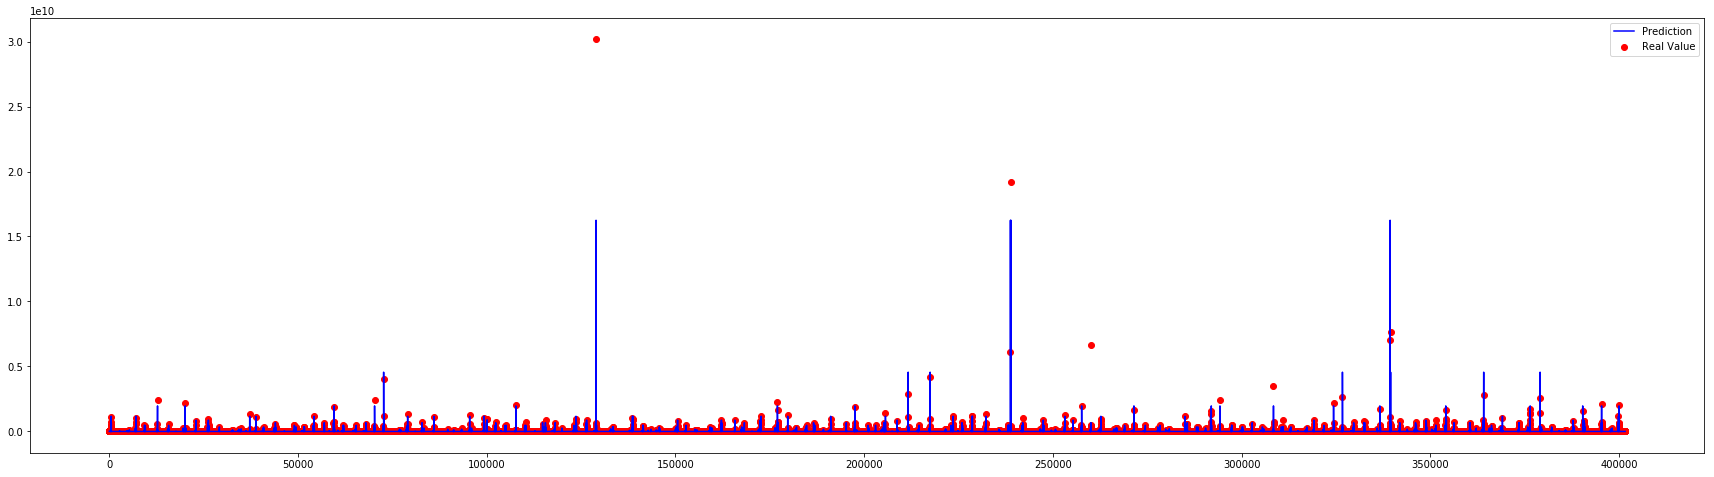

In [35]:
fig = plt.figure(figsize=(30,8))
ax = plt.axes()

ax.plot(predictions.index, predictions, color = 'blue', label='Prediction')
ax.scatter(test_y.index, test_y, color = 'red', label='Real Value')

ax.legend(loc='best')
plt.show()